In [1]:
import streamlit as st

import json
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd

In [2]:
def initialize_firebase():
    # cred = credentials.Certificate("/home/maojia/work/hallucination_app/hallucination-human-eval-firebase-adminsdk-u77sb-82eeb9f363.json")
    service_account_info = {
        "type": st.secrets["firebase"]["type"],
        "project_id": st.secrets["firebase"]["project_id"],
        "private_key_id": st.secrets["firebase"]["private_key_id"],
        "private_key": st.secrets["firebase"]["private_key"].replace("\\n", "\n"),
        "client_email": st.secrets["firebase"]["client_email"],
        "client_id": st.secrets["firebase"]["client_id"],
        "auth_uri": st.secrets["firebase"]["auth_uri"],
        "token_uri": st.secrets["firebase"]["token_uri"],
        "auth_provider_x509_cert_url": st.secrets["firebase"]["auth_provider_x509_cert_url"],
        "client_x509_cert_url": st.secrets["firebase"]["client_x509_cert_url"]
    }
    if not firebase_admin._apps:
        cred = credentials.Certificate(service_account_info)
        firebase_admin.initialize_app(cred)
    return firestore.client()

# Initialize Firestore
db = initialize_firebase()

In [50]:
def get_all_collections():
    collections = db.collections()
    collection_names = [collection.id for collection in collections]
    return collection_names

def get_all_documents_from_collection(collection_name):
    collection_ref = db.collection(collection_name)
    docs = collection_ref.stream()

    all_documents = []
    for doc in docs:
        document_data = doc.to_dict()
        document_data['id'] = doc.id  # Optionally include the document ID
        all_documents.append(document_data)
    
    return all_documents

collections = get_all_collections()
all_data = []

for collection in collections:
    print(collection)
    documents = get_all_documents_from_collection(collection)
    all_data.extend(documents)
df_raw = pd.DataFrame(all_data)

form_Ambuj_responses
form_Ken_responses
form_Pengfei_responses
form_Rima Hazra_responses
form_Shaozuo_responses
form_sunqi_responses


In [52]:
df_raw.head()

,question_set,response,timestamp,question,rater,id
0,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15T13:11:11.956150,14,Ambuj,1sYA9ogCOJcQ42vRRTEK
1,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15T13:11:09.999878,264,Ambuj,CM0kh5Zuo04PYwxmvMMc
2,3,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15T13:11:08.774548,982,Ambuj,FFgx76vMQOUurThgfipw
3,3,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15T13:11:12.299475,707,Ambuj,JgLo4FmEE6YZLddajz3Q
4,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15T13:11:10.801599,378,Ambuj,L000iEcltQ81EUgr2aqO


In [53]:
raters = df_raw['rater'].unique().tolist()

# de duplicate per rater
cleaned_df = []
for rater in raters:
    df_temp = df_raw.loc[df_raw['rater'] == rater].copy()
    df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
    df_temp = df_temp.sort_values(by=['question', 'timestamp'], ascending=[True, False])
    df_temp = df_temp.drop_duplicates(subset='question', keep='first')
    df_temp.reset_index(drop=True, inplace=True)
    display(df_temp)

    cleaned_df.append(df_temp)

df_clean = pd.concat(cleaned_df)

,question_set,response,timestamp,question,rater,id
0,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:11:11.956150,14,Ambuj,1sYA9ogCOJcQ42vRRTEK
1,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:11:09.999878,264,Ambuj,CM0kh5Zuo04PYwxmvMMc
2,3,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 13:11:10.993484,340,Ambuj,cdxZPE4F7DRZE591h6Eh
3,3,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:11:10.801599,378,Ambuj,L000iEcltQ81EUgr2aqO
4,3,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 13:11:09.801798,394,Ambuj,v91cZlz2L515v9V7A3YM
5,3,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 13:11:11.760207,67,Ambuj,MDOpUoqm2WwlIc0WnBzS
6,3,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 13:11:12.299475,707,Ambuj,JgLo4FmEE6YZLddajz3Q
7,3,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 13:11:08.774548,982,Ambuj,FFgx76vMQOUurThgfipw


,question_set,response,timestamp,question,rater,id
0,4,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 13:14:13.873036,113,Ken,UqDzaBRgQEkGPpoXPojs
1,4,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:14:16.886544,142,Ken,kZbPwpid0Txak2bc6Rtq
2,4,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 13:14:15.084994,15,Ken,I5wsoJChG9Ha0lW08FeX
3,4,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 13:14:15.896000,396,Ken,6hLCCJMiejktYutUdSD0
4,4,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:14:16.088813,596,Ken,RoCBXi4q26StObhHyCWJ
5,4,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 13:14:14.863508,811,Ken,PHetpEnZpD5sVqxVTn0A


,question_set,response,timestamp,question,rater,id
0,2,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-16 01:19:29.862669,165,Pengfei,x4cVOLCtA1yaWjRmlZdR
1,2,"{'llama3_answer': '3 - Neutral', 'gpt35_answer...",2024-08-16 01:19:31.951348,172,Pengfei,SShD8JfuuL8EU6zgtyze
2,2,"{'llama3_answer': '3 - Neutral', 'gpt35_answer...",2024-08-16 01:19:31.376087,483,Pengfei,H41FPpMp8kMuivzwQ37a
3,2,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-16 01:19:31.039072,65,Pengfei,0sjNmipZ8FKvdSl0yIZO
4,2,"{'llama3_answer': '3 - Neutral', 'gpt35_answer...",2024-08-16 01:19:30.052338,66,Pengfei,sFLwTOPHRoM1yioQWvGj
5,2,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-16 01:19:31.744341,68,Pengfei,GdMTQNQq5w7Sa2QOYrs0
6,2,"{'llama3_answer': '3 - Neutral', 'gpt35_answer...",2024-08-16 01:19:28.797343,853,Pengfei,V0jcVHLhPEckB8DXEqfW
7,2,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-16 01:19:30.823008,988,Pengfei,9WxwRJ0YWEeNhxw7tAUp


,question_set,response,timestamp,question,rater,id
0,2,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:41:31.547538,165,Rima Hazra,nOPkjlZw0qzO4i0kNHvo
1,2,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:41:33.920858,172,Rima Hazra,feeSohW5J2S9PHytLFbK
2,2,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 15:41:33.540725,483,Rima Hazra,5X542XO024nIqI6EWZFi
3,2,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:41:32.723451,65,Rima Hazra,jFUdr5TqUlKqPSXtDRY4
4,2,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 15:41:31.751553,66,Rima Hazra,TDhvCSp2BiiDcAFXAYRm
5,2,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 15:41:33.732706,68,Rima Hazra,IjeyRAvhrJZQu5itG5V7
6,2,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 15:41:30.569124,853,Rima Hazra,U7nNeQ7yyFE3S32dDKK4
7,2,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 15:41:32.543288,988,Rima Hazra,KHugkFEgBuRWbV1OjzGc


,question_set,response,timestamp,question,rater,id
0,4,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 12:28:10.048755,113,Shaozuo,PDaouQtLrrjeahKSgNLs
1,4,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 12:28:13.082503,142,Shaozuo,OldrXPAqzscggULVGfrl
2,4,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 12:28:11.338672,15,Shaozuo,xjS8HTgjMksCRfzToprR
3,4,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 12:28:12.116607,396,Shaozuo,PsXAHSvdvNOzwiDLpr1i
4,4,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 12:28:12.319205,596,Shaozuo,wamfgmNvbJ1IPdgBdrpT
5,4,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 12:28:11.127986,811,Shaozuo,c9P3GVjIjQkHXznmTdhi


,question_set,response,timestamp,question,rater,id
0,1,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 15:35:11.277565,291,sunqi,z0UBp26iK3JuUQ5nGhW1
1,1,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:35:13.256521,313,sunqi,lnLDKu94UJ3QOhapPWdd
2,1,"{'llama3_answer': '1 - Strongly Agree', 'gpt35...",2024-08-15 15:35:11.466139,395,sunqi,SCEaJjLAtQq5mERnQ3ZB
3,1,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 15:35:13.649634,463,sunqi,0z2WX435aPjaWLPae9ED
4,1,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:35:12.263016,563,sunqi,NT1lauefhcjIT0ZEyhFu
5,1,"{'llama3_answer': '2 - Agree', 'gpt35_answer':...",2024-08-15 15:35:13.479533,624,sunqi,oqh2Z6Fke5iaWePHsweN
6,1,"{'llama3_answer': '5 - Strongly Disagree', 'gp...",2024-08-15 15:35:12.460289,933,sunqi,AtwHBLyKHVS0JEI3NMIz
7,1,"{'llama3_answer': '4 - Disagree', 'gpt35_answe...",2024-08-15 15:35:10.240449,945,sunqi,TXHkbRpYhJlqJe4rbvfx


In [54]:
df = df_clean.sort_values(by=['question'], ascending=[True]).reset_index()

# unpack response column
response_df = df['response'].apply(pd.Series)
df = pd.concat([df.drop('response', axis=1), response_df], axis=1)

def extract_number(answer):
    return answer.split(' ')[0]  # Split the string by spaces and take the first part

# Apply the function to the relevant columns
df['llama3_answer'] = df['llama3_answer'].apply(extract_number)
df['gpt35_answer'] = df['gpt35_answer'].apply(extract_number)

# Convert the extracted numbers to integers (optional, if you want numeric types)
df['llama3_answer'] = df['llama3_answer'].astype(int)
df['gpt35_answer'] = df['gpt35_answer'].astype(int)

df['question'] = df['question'].astype(int)

display(df.head())

,index,question_set,timestamp,question,rater,id,llama3_answer,gpt35_answer
0,0,4,2024-08-15 12:28:10.048755,113,Shaozuo,PDaouQtLrrjeahKSgNLs,1,1
1,0,4,2024-08-15 13:14:13.873036,113,Ken,UqDzaBRgQEkGPpoXPojs,4,4
2,0,3,2024-08-15 13:11:11.956150,14,Ambuj,1sYA9ogCOJcQ42vRRTEK,2,1
3,1,4,2024-08-15 12:28:13.082503,142,Shaozuo,OldrXPAqzscggULVGfrl,1,1
4,1,4,2024-08-15 13:14:16.886544,142,Ken,kZbPwpid0Txak2bc6Rtq,2,2


In [55]:
with open('output.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
data_summary = []
for d in data:
    out = {'question' : d['label'], 'reject': d['reject']}
    data_summary.append(out)

df_reject = pd.DataFrame(data_summary)
df_final = df.merge(df_reject, left_on='question', right_on='question')

In [57]:
df_final.head()

,index,question_set,timestamp,question,rater,id,llama3_answer,gpt35_answer,reject
0,0,4,2024-08-15 12:28:10.048755,113,Shaozuo,PDaouQtLrrjeahKSgNLs,1,1,True
1,0,4,2024-08-15 13:14:13.873036,113,Ken,UqDzaBRgQEkGPpoXPojs,4,4,True
2,0,3,2024-08-15 13:11:11.956150,14,Ambuj,1sYA9ogCOJcQ42vRRTEK,2,1,False
3,1,4,2024-08-15 12:28:13.082503,142,Shaozuo,OldrXPAqzscggULVGfrl,1,1,True
4,1,4,2024-08-15 13:14:16.886544,142,Ken,kZbPwpid0Txak2bc6Rtq,2,2,True


In [65]:
# Group the DataFrame by 'question' and calculate mean and std deviation
stats = df.groupby('question').agg({
    'llama3_answer': ['mean', 'std'],
    'gpt35_answer': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
stats.columns = ['question', 'llama3_mean', 'llama3_std', 'gpt35_mean', 'gpt35_std']

stats = stats.merge(df_reject,left_on='question', right_on='question')

# Display the resulting DataFrame with mean and std deviation for each question
display(stats)


,question,llama3_mean,llama3_std,gpt35_mean,gpt35_std,reject
0,14,2.0,NaN,1.0,NaN,False
1,15,4.5,0.707107,4.5,0.707107,True
2,65,3.0,1.414214,1.5,0.707107,False
3,66,3.5,0.707107,4.0,1.414214,False
4,67,1.0,NaN,1.0,NaN,True
5,68,1.0,0.000000,1.0,0.000000,True
6,113,2.5,2.121320,2.5,2.121320,True
7,142,1.5,0.707107,1.5,0.707107,True
8,165,2.0,0.000000,4.0,0.000000,False
9,172,2.5,0.707107,2.0,1.414214,False


In [66]:
stats = stats.sort_values(by='reject', ascending=True).reset_index(drop=True)

In [73]:
stats

,question,llama3_mean,llama3_std,gpt35_mean,gpt35_std,reject
0,14,2.0,NaN,1.0,NaN,False
1,853,4.0,1.414214,1.0,0.000000,False
2,596,3.0,1.414214,3.0,1.414214,False
3,563,2.0,NaN,4.0,NaN,False
4,483,2.0,1.414214,2.0,1.414214,False
5,463,5.0,NaN,4.0,NaN,False
6,394,1.0,NaN,5.0,NaN,False
7,313,2.0,NaN,5.0,NaN,False
8,264,2.0,NaN,1.0,NaN,False
9,378,2.0,NaN,4.0,NaN,False


In [ ]:
grouped = df_clean.groupby('question')['response'].apply(list).reset_index()

# Display the grouped DataFrame
print(grouped)

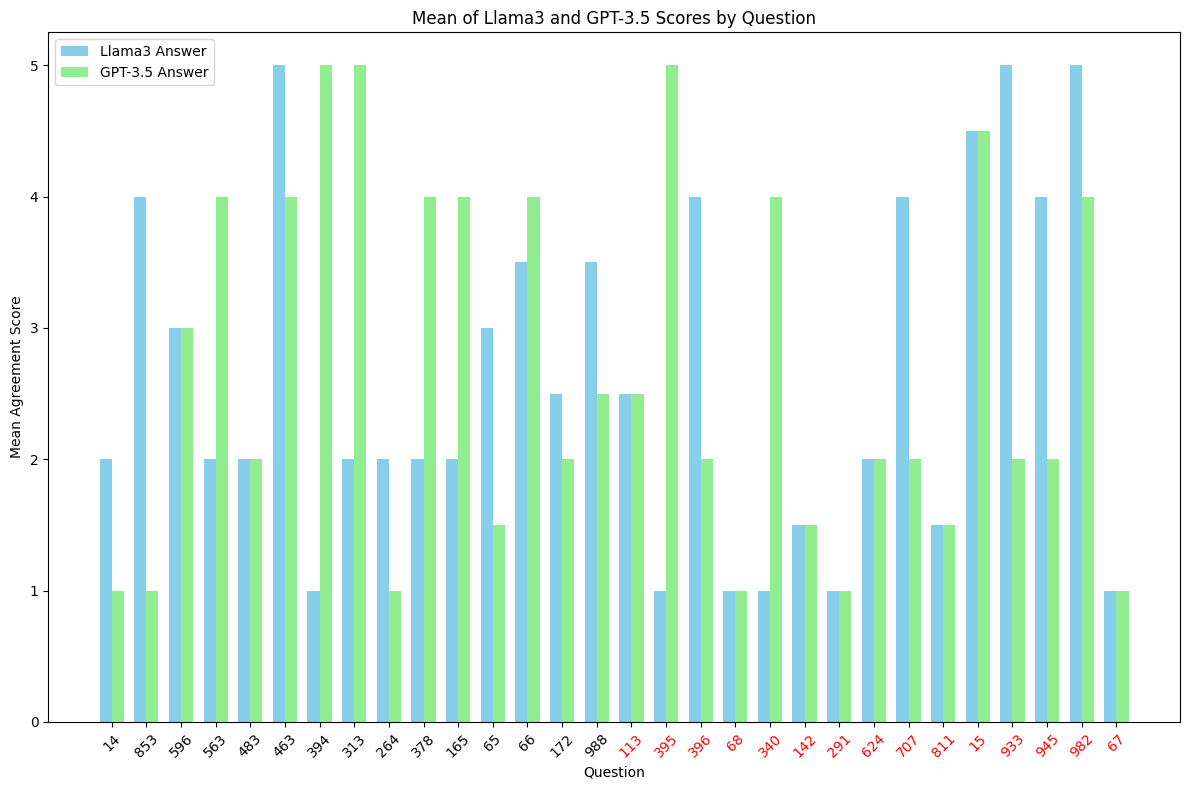

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming stats is your DataFrame with the calculated mean and std deviation
# from the previous step

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(stats['question']))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars for llama3_answer
bars1 = ax.bar(index, stats['llama3_mean'], bar_width, 
               capsize=5, label='Llama3 Answer', color='skyblue')

# Plot the bars for gpt35_answer next to the llama3_answer bars
bars2 = ax.bar(index + bar_width, stats['gpt35_mean'], bar_width, 
               capsize=5, label='GPT-3.5 Answer', color='lightgreen')

# Set the labels and title
ax.set_xlabel('Question')
ax.set_ylabel('Mean Agreement Score')
ax.set_title('Mean of Llama3 and GPT-3.5 Scores by Question')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f"{question}" for question in stats['question']], rotation=45)

# Highlight the labels by coloring them
for label, reject in zip(ax.get_xticklabels(), stats['reject']):
    if reject:
        label.set_color('red')
    else:
        label.set_color('black')
# Add a legend to the plot
ax.legend()

# Ensure plot displays
plt.tight_layout()
plt.show()


In [13]:
%matplotlib inline
